<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [10]:
boston_df.head(3)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7


In [11]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


2a: For "Median value of owner-occupied homes" provide a boxplot

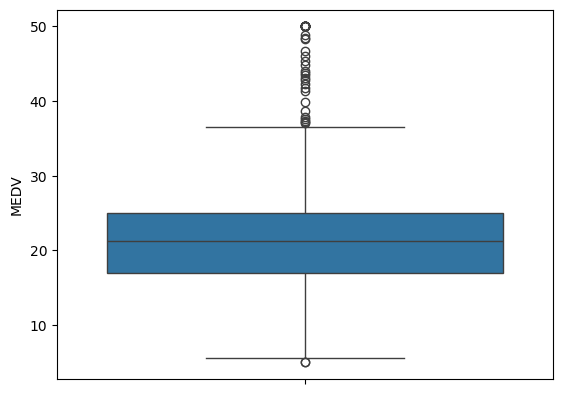

In [12]:
ax = sns.boxplot(y='MEDV', data=boston_df)

2b: Provide a bar plot for the Charles river variable

[22.093842887473464, 28.439999999999998]


<BarContainer object of 2 artists>

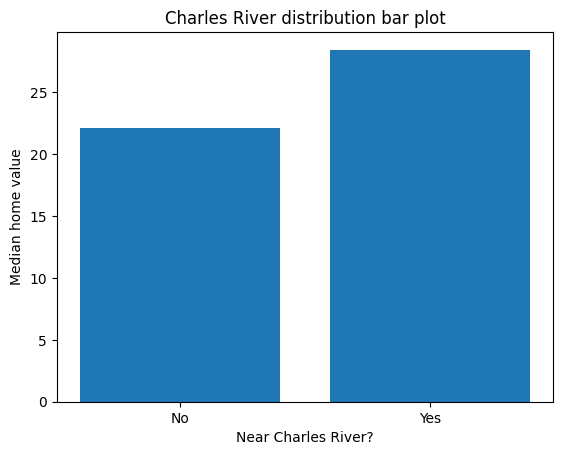

In [13]:
y_median_values = [boston_df[boston_df['CHAS'] == 0.0]['MEDV'].mean(),boston_df[boston_df['CHAS'] == 1.0]['MEDV'].mean()]
x_charles_river = ['No', 'Yes']
pyplot.xlabel('Near Charles River?')
pyplot.ylabel('Median home value')
pyplot.title('Charles River distribution bar plot')
print(y_median_values)
pyplot.bar(x_charles_river, y_median_values)

2c: Provide a boxplot for MEDV variable vs AGE. Put age into 3 buckets: <=35, >35 & <70, >=70

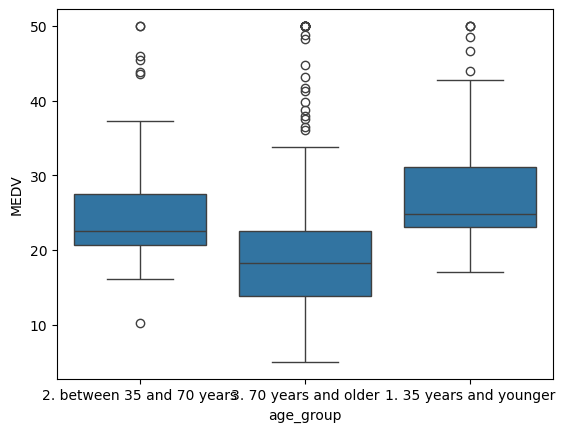

In [14]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '1. 35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = '2. between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '3. 70 years and older'
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)

2d: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

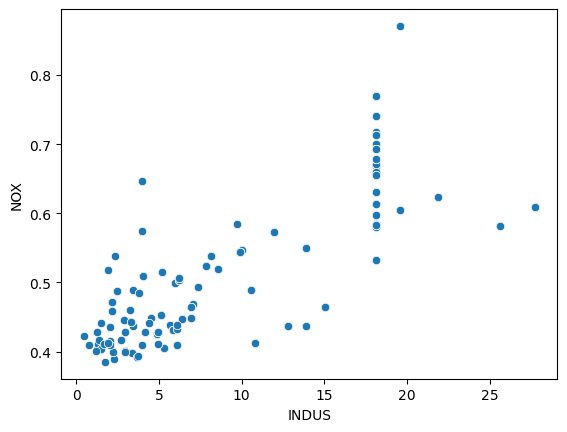

In [15]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.show()

2e: Create a histogram for the pupil to teacher ratio variable

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

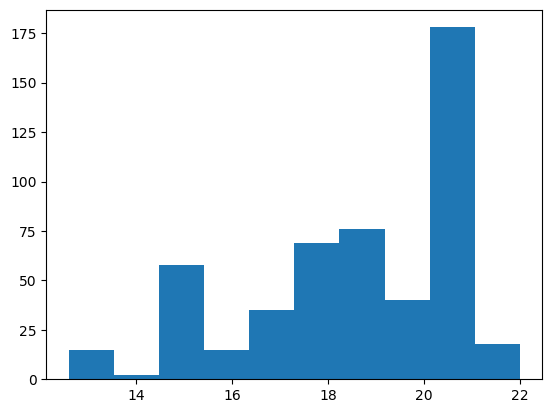

In [16]:
pyplot.hist(boston_df['PTRATIO'])

3a: Null Hypothesis: there is no significant difference in median values of houses bounded by the Charles River

In [19]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var= True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

3a: Conclusion: since p-value is less than alpha value 0.05, we reject null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles River

3b: Null hypothesis: there is no significant difference in median values of houses for each proportion of owner occupied units built prior to 1940

In [32]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [33]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [34]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


3b: Conclusion: since p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ

3c: Null hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [38]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

3c: Conclusion: since p-value < 0.05, we reject the null hypothesis and conclude that there exists a relationship between proportion of non-retail business acres per town and Nitric oxide concentrations

3d: Null hypothesis: additional weighted difference to the five Boston employment centers has no impact on the median value of owner occupied homes

In [39]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        11:30:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3d: Conclusion: since p-value is less than 0.05, we reject null hypothesis that there is no difference in median home value based on distance from employment center. The greater the distance to Boston's employment centers, the greater the median home value

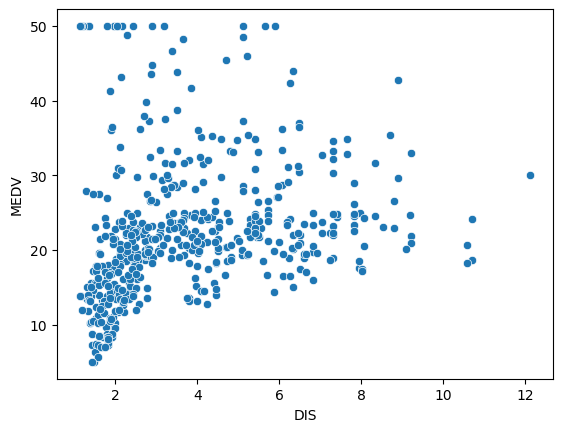

In [40]:
ax = sns.scatterplot(x='DIS',y='MEDV',data=boston_df)